### Perfroming classification on car dataset using decision tree

Dataset complete info:'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
## Attribute information
1. Class Values:  unacc, acc, good, vgood

### Attributes:

2. buying: vhigh, high, med, low.
3. maint: vhigh, high, med, low.
4. doors: 2, 3, 4, 5more.
5. persons: 2, 4, more.
6. lug_boot: small, med, big.
7. safety: low, med, high.

### Loding and visualizing the dataset

In [1]:
car_data ='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'


In [2]:
import pandas as pd
pd.read_csv(car_data,header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
column =['buying','maint','doors','persons','lug_boot','safety','Acceptabilty']

In [4]:
df = pd.read_csv(car_data,names=column)
df.head()

,buying,maint,doors,persons,lug_boot,safety,Acceptabilty
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1728 non-null   object
 1   maint         1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_boot      1728 non-null   object
 5   safety        1728 non-null   object
 6   Acceptabilty  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
# import matplotlib.pyplot as plt
# for col_name in df.columns:
#         plt.figure()
#         plt.hist(df[col_name])
#         plt.title(col_name)

### Encoding the dataset

In [24]:
buying = df.buying.unique()[::-1]
print(buying)

['low' 'med' 'high' 'vhigh']


In [26]:
maint = df.maint.unique()[::-1]
print(maint)

['low' 'med' 'high' 'vhigh']


In [28]:
door = df.doors.unique()
print(door)

['2' '3' '4' '5more']


In [30]:
person = df.persons.unique()
print(person)

['2' '4' 'more']


In [32]:
boot = df.lug_boot.unique()
print(boot)

['small' 'med' 'big']


In [33]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'Acceptabilty'],
      dtype='object')

In [35]:
safe =df.safety.unique()


In [38]:
accept = df.Acceptabilty.unique()

In [40]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
oe = OrdinalEncoder(categories = [buying,maint,door,person,boot,safe,accept])

In [42]:
oe.fit(df)

OrdinalEncoder(categories=[array(['low', 'med', 'high', 'vhigh'], dtype=object),
                           array(['low', 'med', 'high', 'vhigh'], dtype=object),
                           array(['2', '3', '4', '5more'], dtype=object),
                           array(['2', '4', 'more'], dtype=object),
                           array(['small', 'med', 'big'], dtype=object),
                           array(['low', 'med', 'high'], dtype=object),
                           array(['unacc', 'acc', 'vgood', 'good'], dtype=object)])

In [43]:
new_df= oe.transform(df)

### Splitting the dataset and training the model

In [49]:
X, y = new_df[:, :-1], new_df[:, -1]

In [50]:
X.shape

(1728, 6)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3,stratify=y)

In [53]:
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

In [54]:
from sklearn import tree 

In [55]:
# # visualizing the first decision tree in the forest
# index = 0
# plt.figure(figsize=(15, 15))
# tree.plot_tree(clf.estimators_[index],
#                    feature_names = new_df.columns, 
#                    class_names=["unacc", "acc", "good", "vgood"],
#                    filled = True,);



In [56]:
prediction =clf.predict(X_test)
prediction

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       3., 0., 0., 0., 1., 0., 0., 0., 3., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 2., 1., 0., 0.,
       0., 0., 2., 3., 0., 0., 0., 0., 0., 0., 1., 1., 2., 1., 0., 1., 0.,
       3., 2., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 3., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 2., 0., 0., 0., 0., 3., 0., 0., 1., 0., 0., 1., 2.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 2., 0., 1., 0., 0., 0., 0., 0., 1.,
       2., 1., 0., 0., 0., 0., 1., 0., 3., 2., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 3., 1., 2., 0., 2., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 2., 0., 0.,
       1., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0.,
       0., 1., 1., 0., 0.

### Checking accurary of the model

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


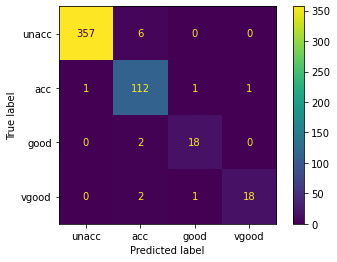

In [60]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, display_labels=["unacc", "acc", "good", "vgood"])

In [58]:
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       363
         1.0       0.92      0.97      0.95       115
         2.0       0.90      0.90      0.90        20
         3.0       0.95      0.86      0.90        21

    accuracy                           0.97       519
   macro avg       0.94      0.93      0.93       519
weighted avg       0.97      0.97      0.97       519



### Trying to check the best estimators using GridSearchCV

In [22]:
parameters = {'n_estimators':[500,1000,1500,1728], 'criterion': ( 'gini' , 'entropy') , 'max_depth' :[5,8,12],'max_features':('auto',  'log2')  }

In [23]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(clf, parameters)

In [24]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [5, 8, 12],
                         'max_features': ('auto', 'log2'),
                         'n_estimators': [500, 1000, 1500, 1728]})

In [25]:
tuned_model = grid_search.best_estimator_
print(grid_search.best_score_)
tuned_model

0.9586365350982475


RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=1728,
                       random_state=0)

In [26]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.002383,0.132486,0.077752,0.003653,gini,5,auto,500,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.896694,0.880165,0.913223,0.871901,0.904564,0.893310,0.015269,45
1,1.846462,0.021383,0.148708,0.002134,gini,5,auto,1000,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.896694,0.884298,0.909091,0.871901,0.904564,0.893310,0.013614,45
2,2.954380,0.115375,0.246648,0.024686,gini,5,auto,1500,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.900826,0.880165,0.917355,0.876033,0.904564,0.895789,0.015504,41
3,3.206023,0.025291,0.258042,0.003967,gini,5,auto,1728,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.900826,0.876033,0.913223,0.876033,0.904564,0.894136,0.015318,43
4,0.914236,0.013430,0.075154,0.001938,gini,5,log2,500,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.896694,0.880165,0.913223,0.871901,0.904564,0.893310,0.015269,45
5,1.850260,0.021938,0.148309,0.000799,gini,5,log2,1000,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.896694,0.884298,0.909091,0.871901,0.904564,0.893310,0.013614,45
6,2.765096,0.009510,0.222063,0.004066,gini,5,log2,1500,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.900826,0.880165,0.917355,0.876033,0.904564,0.895789,0.015504,41
7,3.339743,0.177523,0.266435,0.027315,gini,5,log2,1728,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.900826,0.876033,0.913223,0.876033,0.904564,0.894136,0.015318,43
8,0.970002,0.009804,0.081350,0.006402,gini,8,auto,500,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.954545,0.966942,0.975207,0.938017,0.929461,0.952834,0.017137,21
9,1.935607,0.014776,0.155105,0.002784,gini,8,auto,1000,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.950413,0.962810,0.975207,0.938017,0.933610,0.952011,0.015438,23


#### Applying LDA before Random forest to see if has any effect on performance

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
lda = LinearDiscriminantAnalysis()


In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
X_train_scaled_lda= lda.fit_transform(X_train_scaled,y_train)
X_test_scaled_lda= lda.transform(X_test_scaled)


In [60]:
clf2 = RandomForestClassifier()
clf2.fit(X_train_scaled_lda, y_train)

RandomForestClassifier()

In [61]:
prediction = clf2.predict(X_test_scaled_lda)
prediction

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 4, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 4, 1, 1, 1, 3, 2, 1, 1,
       3, 2, 1, 4, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 1, 2, 1, 2, 1, 1, 1,
       1, 4, 3, 2, 1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1,

In [62]:
clf2.score(X_test_scaled_lda,y_test)

0.8439306358381503

#### Applying PCA before Random forest to see if has any effect on performance

In [64]:
from sklearn.decomposition import PCA
pca = PCA()

In [67]:
X_train_scaled_pca= pca.fit_transform(X_train_scaled,y_train)
X_test_scaled_pca= pca.transform(X_test_scaled)

In [68]:
clf3 = RandomForestClassifier()
clf3.fit(X_train_scaled_pca, y_train)

RandomForestClassifier()

In [69]:
clf3.score(X_test_scaled_lda,y_test)

0.8516377649325626

In [ ]:

plot_confusion_matrix(clf, X_test, y_test, display_labels=["unacc", "acc", "good", "vgood"])